<a href="https://colab.research.google.com/github/sphy1597/Spp_k-digital-2-/blob/main/spp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글 드라이브 연동 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


필요한 라이브러리 

In [ ]:
from bs4 import BeautifulSoup
import urllib.request as req
import pandas as pd



읽어오면서 숫자로 인식해 앞에 0들 지워짐 
앞에 0채우고 A추가 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/data.csv')
# 숫자형태로 읽어온 값 앞에 0채우기
df['종목코드'] = df['종목코드'].apply(lambda x : str(x).zfill(6))
# 앞에 A붙이기
df['종목코드'] = "A"+df['종목코드']
df

,종목명,종목코드
0,BGF리테일,A282330
1,BNK금융지주,A138930
2,CJ,A001040
3,CJ대한통운,A000120
4,CJ제일제당,A097950
...,...,...
195,효성,A004800
196,효성첨단소재,A298050
197,효성티앤씨,A298020
198,후성,A093370


재무제표 크롤링 테스트

In [ ]:
# 테스트용
for i in range(0,2,1):  
  code = df.iat[i,1]
  url = "https://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?pGB=1&gicode="+code
  url += "&cID=&MenuYn=Y&ReportGB=&NewMenuID=11&stkGb=701"
  res = req.urlopen(url)
  soup = BeautifulSoup(res, "html.parser")

  name = soup.select_one("#giName").string
  date = soup.select_one("#highlight_D_Y > table > thead > tr.td_gapcolor2 > th:nth-of-type(1) > div").string
  per = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(22) > td:nth-of-type(1)").string
  pbr = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(23) > td:nth-of-type(1)").string
  eps = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(19) > td:nth-of-type(1)").string
  roe = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(18) > td:nth-of-type(1)").string
  bps = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(20) > td:nth-of-type(1)").string

  company_data.loc[i]=[name,code,date,per,pbr,eps, roe, bps]

##재무제표 크롤링

In [ ]:
company_data = pd.DataFrame(columns=['이름', '종목코드', '년도', 'PER', 'PBR', 'EPS', 'ROE', 'BPS'])

for i in range(0,200,1):

  try:
    code = df.iat[i,1]
      
    url = "https://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?pGB=1&gicode="+code
    url += "&cID=&MenuYn=Y&ReportGB=&NewMenuID=11&stkGb=701"
    res = req.urlopen(url)
    soup = BeautifulSoup(res, "html.parser")

    name = soup.select_one("#giName").string
    date = soup.select_one("#highlight_D_Y > table > thead > tr.td_gapcolor2 > th:nth-of-type(4) > div").string
    per = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(22) > td:nth-of-type(4)").string
    pbr = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(23) > td:nth-of-type(4)").string
    eps = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(19) > td:nth-of-type(4)").string
    roe = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(18) > td:nth-of-type(4)").string
    bps = soup.select_one("#highlight_D_Y > table > tbody > tr:nth-of-type(20) > td:nth-of-type(4)").string


    company_data.loc[i]=[name,code,date,per,pbr,eps, roe, bps]
    
  except:   
    continue

 

위에 값을 변형 시켜서 여러번 돌려야 함 

처음 돌릴때

In [ ]:
all_data = company_data

두번 째 부터

In [ ]:
all_data = pd.concat([all_data,company_data])

결과 엑셀파일 생성 

In [ ]:
#200개의 회사들 17-20 4년에 해당하는 정보들 
all_data

,이름,종목코드,년도,PER,PBR,EPS,ROE,EPS
0,BGF리테일,A282330,2017/12,129.70,9.30,"1,619",,"22,586"
1,BNK금융지주,A138930,2017/12,7.62,0.44,"1,237",5.83,"21,654"
2,CJ,A001040,2017/12,21.17,2.39,"8,083",12.10,"71,749"
3,CJ대한통운,A000120,2017/12,68.28,1.12,"2,050",1.99,"125,258"
4,CJ제일제당,A097950,2017/12,14.33,1.53,"25,537",10.91,"239,601"
...,...,...,...,...,...,...,...,...
195,효성,A004800,2020/12,N/A,0.71,"-2,504",-2.26,"107,987"
196,효성첨단소재,A298050,2020/12,"8,489.96",2.12,18,0.02,"70,257"
197,효성티앤씨,A298020,2020/12,6.68,1.51,"31,610",25.10,"139,553"
198,후성,A093370,2020/12,109.53,4.93,108,4.60,"2,394"


In [ ]:
# 회사 재무제표에 정보들 엑셀파일로 생성
all_data.to_excel('17-20.xlsx')

## 코스피200에 포함된 회사들의 18-20년 주가 검색


In [ ]:
#테스트용

code = df.iat[1,1]

url = "https://comp.fnguide.com/SVO2/ASP/SVD_Invest.asp?pGB=1&gicode="+code
url += "&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701"
res = req.urlopen(url)
soup = BeautifulSoup(res, "html.parser")
print(url)

code = soup.select_one("#compBody > div.section.ul_corpinfo > div.corp_group1 > h2:nth-of-type(1)").string
date = soup.select_one("#compBody > div.section.ul_de > div:nth-of-type(4) > div.um_table > table > thead > tr.th2row_f > th:nth-of-type(3)").string # 18=2, 19=3, 
price =soup.select_one("#compBody > div.section.ul_de > div:nth-of-type(4) > div.um_table > table > tbody > tr:nth-of-type(1) > td:nth-of-type(3)").string # 18=1, 19=3
nextprice = soup.select_one("#compBody > div.section.ul_de > div:nth-of-type(4) > div.um_table > table > tbody > tr:nth-of-type(1) > td:nth-of-type(5)").string # 18=1, 19=3
price = float(price.replace(',', ''))
nextprice = float(nextprice.replace(',', ''))
per = ((nextprice - price)/price)*100
print(code)
print(date)
print(price)
print(nextprice)
print("{:.3f}%".format(per))

https://comp.fnguide.com/SVO2/ASP/SVD_Invest.asp?pGB=1&gicode=A138930&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701
138930
2018/12
11200.0
7890.0
-29.554%


In [ ]:
stock_price = pd.DataFrame(columns=['종목코드', '년/월', '주가'])

for i in range(0,200,1):

  try:
    code = df.iat[i,1]
    
    url = "https://comp.fnguide.com/SVO2/ASP/SVD_Invest.asp?pGB=1&gicode="+code
    url += "&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701"
    res = req.urlopen(url)
    soup = BeautifulSoup(res, "html.parser")

    code = "A"+soup.select_one("#compBody > div.section.ul_corpinfo > div.corp_group1 > h2:nth-of-type(1)").string
    date = soup.select_one("#compBody > div.section.ul_de > div:nth-of-type(4) > div.um_table > table > thead > tr.th2row_f > th:nth-of-type(4)").string # 18=2, 19=3, 
    price =soup.select_one("#compBody > div.section.ul_de > div:nth-of-type(4) > div.um_table > table > tbody > tr:nth-of-type(1) > td:nth-of-type(5)").string # 18=1, 19=3
    nextprice = soup.select_one("#compBody > div.section.ul_de > div:nth-of-type(4) > div.um_table > table > tbody > tr:nth-of-type(1) > td:nth-of-type(7)").string # 18=1, 19=3
    price = float(price.replace(',', ''))
    nextprice = float(nextprice.replace(',', ''))
    per = ((nextprice - price)/price)*100

    stock_price.loc[i]=[code, date, per]
    
  except:   
    continue

위에 값을 변형 시키면서 여러번 돌려야 함 

처음 돌리면 

In [ ]:
#18년도 면 그냥 넣기
stock_data = stock_price

두번째 부터 

In [ ]:
# 19년 이후면 위에서 넣은 18년 아래에 합치기
stock_data = pd.concat([stock_data,stock_price])
stock_data

,종목코드,년/월,주가
0,A282330,2018/12,2.422907
1,A138930,2018/12,-29.553571
2,A001040,2018/12,-26.347617
3,A000120,2018/12,8.857143
4,A097950,2018/12,-12.500000
...,...,...,...
195,A004800,2020/12,52.121212
196,A298050,2020/12,425.993884
197,A298020,2020/12,325.968109
198,A093370,2020/12,109.917355


결과값 엑셀로 뽑기

In [ ]:
stock_data.to_excel('18-20_Stock_price.xlsx')


재무제표와 주가 데이터 합쳐서 하나의 데이터로 만듬 

In [ ]:
from pandas.io.excel import read_excel
company_data = read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/17-20_company_info.xlsx')
company_data

,Unnamed: 0,이름,종목코드,년도,PER,PBR,EPS,ROE,EPS.1
0,0,BGF리테일,A282330,2017/12,129.70,9.30,"1,619",,"22,586"
1,1,BNK금융지주,A138930,2017/12,7.62,0.44,"1,237",5.83,"21,654"
2,2,CJ,A001040,2017/12,21.17,2.39,"8,083",12.10,"71,749"
3,3,CJ대한통운,A000120,2017/12,68.28,1.12,"2,050",1.99,"125,258"
4,4,CJ제일제당,A097950,2017/12,14.33,1.53,"25,537",10.91,"239,601"
...,...,...,...,...,...,...,...,...,...
795,195,효성,A004800,2020/12,NaN,0.71,"-2,504",-2.26,"107,987"
796,196,효성첨단소재,A298050,2020/12,"8,489.96",2.12,18,0.02,"70,257"
797,197,효성티앤씨,A298020,2020/12,6.68,1.51,"31,610",25.10,"139,553"
798,198,후성,A093370,2020/12,109.53,4.93,108,4.60,"2,394"


In [20]:
all_data = pd.merge(company_data, stock_data, how='left', left_on=['종목코드', '년도'], right_on=['종목코드', '년/월'])
all_data

,Unnamed: 0,이름,종목코드,년도,PER,PBR,EPS,ROE,EPS.1,년/월,주가
0,0,BGF리테일,A282330,2017/12,129.70,9.30,"1,619",,"22,586",NaN,NaN
1,1,BNK금융지주,A138930,2017/12,7.62,0.44,"1,237",5.83,"21,654",NaN,NaN
2,2,CJ,A001040,2017/12,21.17,2.39,"8,083",12.10,"71,749",NaN,NaN
3,3,CJ대한통운,A000120,2017/12,68.28,1.12,"2,050",1.99,"125,258",NaN,NaN
4,4,CJ제일제당,A097950,2017/12,14.33,1.53,"25,537",10.91,"239,601",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
795,195,효성,A004800,2020/12,NaN,0.71,"-2,504",-2.26,"107,987",2020/12,52.121212
796,196,효성첨단소재,A298050,2020/12,"8,489.96",2.12,18,0.02,"70,257",2020/12,425.993884
797,197,효성티앤씨,A298020,2020/12,6.68,1.51,"31,610",25.10,"139,553",2020/12,325.968109
798,198,후성,A093370,2020/12,109.53,4.93,108,4.60,"2,394",2020/12,109.917355


최종 데이터 엑셀로 저장 

In [ ]:
all_data.to_excel('alldata.xlsx')

In [55]:
clean_data = all_data
clean_data.dropna(axis=0, inplace = True)
clean_data

,Unnamed: 0,이름,종목코드,년도,PER,PBR,EPS,ROE,EPS.1,년/월,주가
200,0,BGF리테일,A282330,2018/12,22.87,6.74,"8,921",33.88,"30,282",2018/12,2.422907
201,1,BNK금융지주,A138930,2018/12,4.76,0.31,"1,540",6.84,"23,401",2018/12,-29.553571
202,2,CJ,A001040,2018/12,25.25,1.63,"4,812",6.91,"74,704",2018/12,-26.347617
203,3,CJ대한통운,A000120,2018/12,72.33,1.22,"2,309",2.11,"136,370",2018/12,8.857143
204,4,CJ제일제당,A097950,2018/12,6.10,1.11,"54,191",21.46,"298,085",2018/12,-12.500000
...,...,...,...,...,...,...,...,...,...,...,...
794,194,화승엔터프라이즈,A241590,2020/12,21.44,1.66,662,9.26,"8,554",2020/12,18.457300
796,196,효성첨단소재,A298050,2020/12,"8,489.96",2.12,18,0.02,"70,257",2020/12,425.993884
797,197,효성티앤씨,A298020,2020/12,6.68,1.51,"31,610",25.10,"139,553",2020/12,325.968109
798,198,후성,A093370,2020/12,109.53,4.93,108,4.60,"2,394",2020/12,109.917355


In [26]:
clean_data.to_excel('clean_data.xlsx')

##머신러닝 

In [89]:
data = read_excel('/content/studydata.xlsx', thousands=',')
data

,PER,PBR,EPS,ROE,BPS,price_per
0,22.87,6.74,8921,33.88,30282,2.422907
1,4.76,0.31,1540,6.84,23401,-29.553571
2,25.25,1.63,4812,6.91,74704,-26.347617
3,72.33,1.22,2309,2.11,136370,8.857143
4,6.10,1.11,54191,21.46,298085,-12.500000
...,...,...,...,...,...,...
460,21.44,1.66,662,9.26,8554,18.457300
461,8489.96,2.12,18,0.02,70257,425.993884
462,6.68,1.51,31610,25.10,139553,325.968109
463,109.53,4.93,108,4.60,2394,109.917355


In [90]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

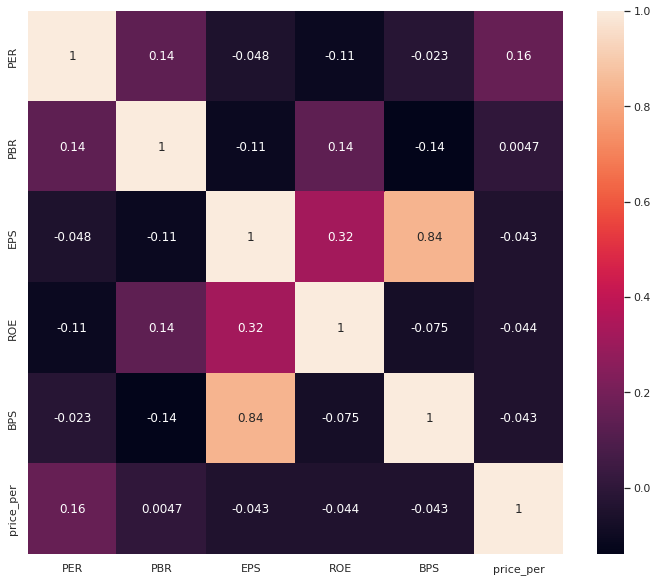

In [91]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = data.corr().round(5)
sns.heatmap(data=correlation_matrix, annot=True)


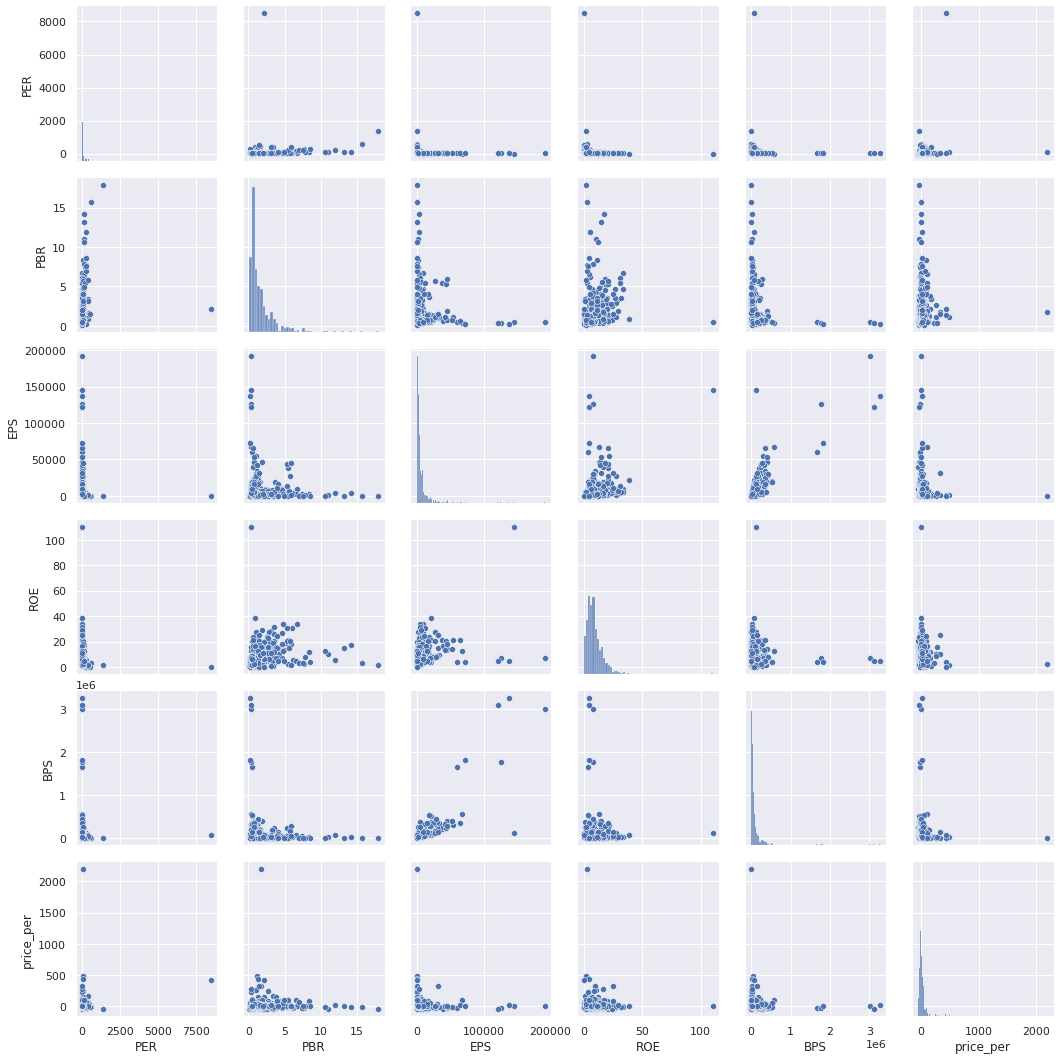

In [92]:
sns.pairplot(data[['PER', 'PBR', 'EPS', 'ROE', 'BPS', 'price_per']])

학습

In [99]:
x = data[['PER', 'PBR', 'EPS', 'ROE', 'BPS']]
y = data['price_per']

regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [94]:
print('절편 : ', regr.intercept_)
print('계수 : ', regr.coef_)
print('예측점수 : ', regr.score(x,y))

절편 :  26.020557569298695
계수 :  [ 4.65290269e-02 -9.73482504e-01  3.71989820e-04 -7.36859765e-01
 -3.65625920e-05]
예측점수 :  0.029799903940427308


예측


In [103]:
X_test = np.array([[79.31,0.33,51,0.44,12251]])
regr.predict(X_test) # 예측

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([28.63635033])